In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import datetime
import keras.models
%matplotlib inline

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential


from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from tensorflow.keras.layers import LSTM


In [2]:
# Load data.
df = pd.read_csv("/content/Complete_Dataset.csv", index_col='DateTime')
df.head(3)

,Load,Solar,Temp
DateTime,,,
2003-11-01 01:00,1001,0,16.8
2003-11-01 02:00,967,0,15.9
2003-11-01 03:00,946,0,15.9


In [3]:
# Define total length of data.
len(df)


17544

In [4]:
# Define the training and testing dataset distribution and also define his steps and features that are required.
test_ = 1544
n_steps = 24
n_features = 1

In [5]:
# Find the dataset location and distributed it also display his according to his shapes.
TestData = df.tail(test_)
Training_Set = df.iloc[:,0:1]
Training_Set = Training_Set[:-test_]

In [6]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (16000, 1)
Test Set Shape  (1544, 3)


In [7]:
# Define the features ranges.
Training_Set = Training_Set
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [8]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END 
for i in range(test_, Train.shape[0]):
    
    X_Train.append(Train[i-test_:i])
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(14456, 1544, 1)
(14456, 1)


In [9]:
# build the model
model = Sequential()
# layer 1: LSTM
model.add(LSTM( units = 50, return_sequences = True, input_shape = (X_Train.shape[1], n_features)))
model.add(Dropout(0.2))
# layer 2: LSTM
model.add(LSTM(units = 50, return_sequences=False))
model.add(Dropout(0.2))
# layer 3: dense
# linear activation: a(x) = x
model.add(Dense(units = 50, activation='linear'))
# Adding the output layer
model.add(Dense(units = 1))
# compile the model
model.compile(loss="mse", optimizer="rmsprop")

In [10]:
# train the model
model.fit(X_Train, Y_Train, batch_size=512, epochs=50, validation_split=0.05, verbose=1)

Epoch 1/50
27/27 [==============================] - 40s 240ms/step - loss: 0.0475 - val_loss: 0.0160
Epoch 2/50
27/27 [==============================] - 6s 210ms/step - loss: 0.0140 - val_loss: 0.0088
Epoch 3/50
27/27 [==============================] - 6s 210ms/step - loss: 0.0111 - val_loss: 0.0059
Epoch 4/50
27/27 [==============================] - 6s 213ms/step - loss: 0.0097 - val_loss: 0.0027
Epoch 5/50
27/27 [==============================] - 6s 214ms/step - loss: 0.0067 - val_loss: 0.0021
Epoch 6/50
27/27 [==============================] - 6s 215ms/step - loss: 0.0058 - val_loss: 0.0028
Epoch 7/50
27/27 [==============================] - 6s 215ms/step - loss: 0.0055 - val_loss: 0.0020
Epoch 8/50
27/27 [==============================] - 6s 213ms/step - loss: 0.0051 - val_loss: 0.0024
Epoch 9/50
27/27 [==============================] - 6s 217ms/step - loss: 0.0048 - val_loss: 0.0013
Epoch 10/50
27/27 [==============================] - 6s 220ms/step - loss: 0.0042 - val_loss: 0.001

In [11]:
# Print the test data.
print(TestData.head(2))
print(TestData.shape)
print(df.shape)

                  Load  Solar  Temp
DateTime                           
2005-08-28 17:00  1447   1132  27.2
2005-08-28 18:00  1426    657  25.6
(1544, 3)
(17544, 3)


In [12]:
# Define the total train and test data.
Df_Total = pd.concat((df[["Load"]], TestData[["Load"]]), axis=0)
print(Df_Total.shape)

(19088, 1)


In [13]:
# Total data save in input function and display his shapes.
inputs = Df_Total[len(Df_Total) - len(TestData) - test_:].values
print(inputs.shape)

(3088, 1)


In [14]:
inputs = Df_Total[len(Df_Total) - len(TestData) - test_:].values
# We need to Reshape
# inputs = np.array(inputs)
inputs = inputs.reshape(-1,1)
# Normalize the Dataset
inputs = sc.transform(inputs)
X_test = []
for i in range(test_, inputs.shape[0]):
    X_test.append(inputs[i-test_:i])
# Convert into Numpy Array
X_test = np.array(X_test)
# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Pass to Model 
print(X_test.shape)
y_pred = model.predict(X_test)
# Do inverse Transformation to get Values 
y_pred = sc.inverse_transform(y_pred)

(1544, 1544, 1)


In [15]:
# evaluate the result
test_mse = model.evaluate(X_test, y_pred, verbose=1)
print ('\nThe mean squared error (MSE) on the test data set is %.3f over %d test samples.' % (test_mse, len(y_pred)))

49/49 [==============================] - 2s 36ms/step - loss: 1404671.8750

The mean squared error (MSE) on the test data set is 1404671.875 over 1544 test samples.


In [16]:
# Test data load in true load and predect data are load in predicted load and test data index are load in dates function.
True_Load = TestData["Load"].to_list()
Predicted_Load  = y_pred
dates = TestData.index.to_list()

In [17]:
# Dates, true load and predicted load are index in dataframe and save it in machine_df and display it.
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "True_Load": True_Load,
    "Predicted_Load":[x[0] for x in Predicted_Load ]
})
print(Machine_Df.head(10))

               Date  True_Load  Predicted_Load
0  2005-08-28 17:00       1447      992.311829
1  2005-08-28 18:00       1426     1393.948120
2  2005-08-28 19:00       1391     1358.185547
3  2005-08-28 20:00       1406     1344.303467
4  2005-08-28 21:00       1357     1374.210083
5  2005-08-28 22:00       1264     1335.544800
6  2005-08-28 23:00       1151     1260.681641
7  2005-08-29 00:00       1086     1170.132690
8  2005-08-29 01:00       1036     1127.127563
9  2005-08-29 02:00       1018     1096.200562


In [18]:
# get the predicted values
predicted_values = model.predict(X_test)
num_test_samples = len(predicted_values)
predicted_values = np.reshape(predicted_values, (num_test_samples,1))

In [24]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [26]:
# Using MAPE error metrics to check for the error rate and accuracy level
LR_MAPE= MAPE(Machine_Df['True_Load'].values, Machine_Df['Predicted_Load'].values)
print("MAPE: ",LR_MAPE)

MAPE:  1.903445356004548


In [28]:
# Find MAE, MSE, RMSE, SD and R_Squared.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(Machine_Df['True_Load'].values, Machine_Df['Predicted_Load'].values)
mse = mean_squared_error(Machine_Df['True_Load'].values, Machine_Df['Predicted_Load'].values)
rmse = np.sqrt(mse)
sd = np.std(Machine_Df)
r2 = r2_score(Machine_Df['True_Load'].values, Machine_Df['Predicted_Load'].values)
print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("SD:",sd)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 22.648485252894268
MSE: 1035.5149817571207
RMSE: 32.17941860502021
SD: True_Load         167.800513
Predicted_Load    165.615492
dtype: float64
R-Squared: 0.9632235490873071


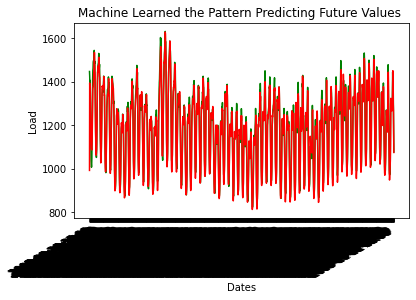

In [29]:
# plot the results
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_Load

y1 = Predicted_Load

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Load")
plt.title("Machine Learned the Pattern Predicting Future Values ")
fig.savefig('output_load_forecasting.jpg', bbox_inches='tight')

In [30]:
# save the result into txt file
test_result = np.vstack((predicted_values, y_pred))
np.savetxt('output_load_forecasting_result.txt', test_result)